### 기술 지원 데이터는 종종 고객 경험 개선 기회에 대한 풍부한 정보 소스가 될 수 있습니다. 제품에 대한 고객의 문제가 적을수록 좋습니다. 고객이 최소한의 노력으로 기술적 과제를 신속하게 극복 할 수 있다면 더욱 좋습니다. 기술 지원 데이터를 분석하고 문제 유형, 문제 해결 시간 및 가장 적합한 지원 채널에 대한 기본적인 분석을 수행하겠습니다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## technical_support_data.csv 파일을 통해, 비슷한 유형의 문제들을 도출하시오.

In [4]:
df = pd.read_csv('technical_support_data.csv')

In [9]:
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [49]:
# drop으로 제거해도 됨
df.drop('PROBLEM_TYPE', axis = 1)

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,cluster
0,170,1.3,32,0.04,0.00,75,25,2
1,12,2.0,150,0.01,0.50,5,95,3
2,5,1.0,35,0.02,0.20,90,10,3
3,3,2.0,8,0.01,0.70,5,95,3
4,45,2.3,54,0.15,0.00,99,1,3
5,47,3.1,132,0.30,0.03,100,0,0
6,12,4.0,154,0.02,0.05,100,0,0
7,165,1.2,32,0.03,0.00,95,5,2
8,321,1.0,5,0.21,0.00,60,40,1
9,22,3.3,140,0.14,0.01,95,5,0


In [16]:
X = df.iloc[: , 1 : ]

In [52]:
X = X.values

In [13]:
from sklearn.cluster import KMeans

In [54]:
km = KMeans(n_clusters=3, init='k-means++', random_state=0)

In [55]:
km.fit_predict(X)

array([0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 2, 2, 2, 0, 1, 0, 1, 1,
       1])

In [57]:
wcss = []
for i in np.arange(1, 10+1):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(X)
    wcss.append( km.inertia_)


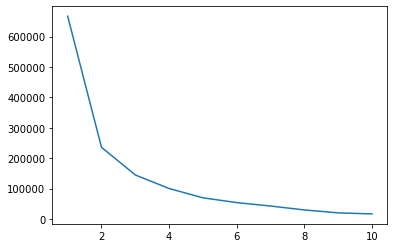

In [58]:
# x축 1-10, y축 wcss값
plt.plot( np.arange(1, 10+1), wcss)
plt.show()

In [59]:
km = KMeans(n_clusters=3, init='k-means++', random_state=0)

In [62]:
y_kmeans = km.fit_predict(X)

In [65]:
y_kmeans

array([0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 2, 2, 2, 0, 1, 0, 1, 1,
       1])

In [66]:
df['cluster'] = y_kmeans

In [67]:
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,cluster
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,1
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,1
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,1


비슷한 케이스 가져오기1

In [69]:
df.loc[ df['cluster'] == 1, ]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,cluster
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95,1
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95,1
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,1
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,1
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,1
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,1
10,Mobile screen blanks on use of phone,23,4.3,143,0.21,0.06,100,0,1
13,AC remote does not work,24,2.8,180,0.04,0.00,100,0,1
18,Factory settings not working,72,2.3,125,0.02,0.00,100,0,1


In [45]:
import seaborn as sb

In [71]:
X

array([[1.70e+02, 1.30e+00, 3.20e+01, 4.00e-02, 0.00e+00, 7.50e+01,
        2.50e+01],
       [1.20e+01, 2.00e+00, 1.50e+02, 1.00e-02, 5.00e-01, 5.00e+00,
        9.50e+01],
       [5.00e+00, 1.00e+00, 3.50e+01, 2.00e-02, 2.00e-01, 9.00e+01,
        1.00e+01],
       [3.00e+00, 2.00e+00, 8.00e+00, 1.00e-02, 7.00e-01, 5.00e+00,
        9.50e+01],
       [4.50e+01, 2.30e+00, 5.40e+01, 1.50e-01, 0.00e+00, 9.90e+01,
        1.00e+00],
       [4.70e+01, 3.10e+00, 1.32e+02, 3.00e-01, 3.00e-02, 1.00e+02,
        0.00e+00],
       [1.20e+01, 4.00e+00, 1.54e+02, 2.00e-02, 5.00e-02, 1.00e+02,
        0.00e+00],
       [1.65e+02, 1.20e+00, 3.20e+01, 3.00e-02, 0.00e+00, 9.50e+01,
        5.00e+00],
       [3.21e+02, 1.00e+00, 5.00e+00, 2.10e-01, 0.00e+00, 6.00e+01,
        4.00e+01],
       [2.20e+01, 3.30e+00, 1.40e+02, 1.40e-01, 1.00e-02, 9.50e+01,
        5.00e+00],
       [2.30e+01, 4.30e+00, 1.43e+02, 2.10e-01, 6.00e-02, 1.00e+02,
        0.00e+00],
       [2.30e+02, 1.30e+00, 2.30e+01, 2.00e

In [74]:
y_means

array([2, 3, 3, 3, 3, 0, 0, 2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 2, 3, 3,
       3])

In [75]:
X[y_means ==0, 3]

array([0.3 , 0.02, 0.14, 0.21, 0.04, 0.02])

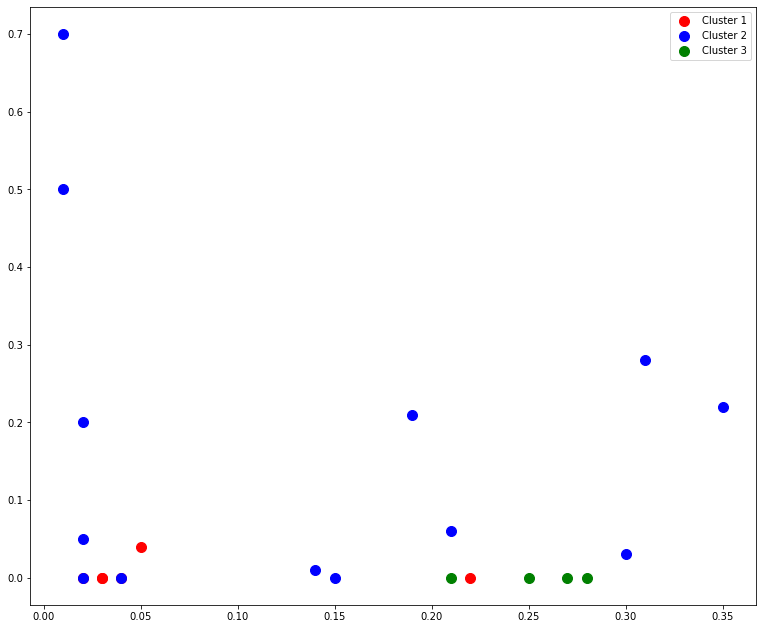

In [70]:

plt.figure(figsize=(13,11))
# kmean 0 그룹만 표시
#  X[y_kmeans ==0, 3] 은 y_kmeans 에서 0이면 true반환, 3번째 열 
# 일단 scatter에서는 x, y 두 축으로만 보여줄 수 있으니깐, 다른 컬럼 수를 넣어주면 그 2개를 비교해서 그릴 수 있음
plt.scatter(X[y_kmeans == 0, 3], X[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Cluster 1')
# kmean 1 그룹만 표시
plt.scatter(X[y_kmeans == 1, 3], X[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'Cluster 2')
# kmean 2 그룹만 표시
plt.scatter(X[y_kmeans == 2, 3], X[y_kmeans == 2, 4], s = 100, c = 'green', label = 'Cluster 3')

#plt.title('Clusters of Customers')
#plt.xlabel('Anual Income')
#plt.ylabel('Spending Score')
# 위의 보조 색깔표시 (색깔이 어떤 cluster인지 표시)
plt.legend()
plt.show()